## PROJECT OVERVIEW: From TikTok to Mainstream: Analyzing the Impact of TikTok Virality on Music Success

**BUSINESS CASE:**
- TikTok has become a major player in music discovery. Artists and labels want to understand the platform's impact on mainstream success. The goal of this project is to quantify the relationship between TikTok popularity and commercial success. 

**DATA SOURCES:**  (January 06 2024 - July 06 2024)
1. Billboard TikTok Top 50
2. Billboard Hot 100
3. Spotify Weekly Top 200 (US)


**KEY QUESTIONS TO ANSWER:**
1. Success Rate Analysis
   - What percentage of TikTok viral songs make it to the Hot 100?
   - How many reach Spotify's top streams?
   - Average time lag between TikTok success and mainstream success

2. Performance Comparison
   - How do songs rank across different platforms?
   - Do TikTok hits perform better on Spotify or Billboard?

3. Longevity Analysis
   - Do TikTok hits stay longer on mainstream charts?
   - Compare weeks-on-chart across platforms
   - Identify patterns in song lifecycle

**DELIVERABLES:**

1. Data Processing
- Clean and standardize song/artist names
- Create matching keys across datasets
- Handle missing values and duplicates

2. Analysis Results
- Platform comparison metrics
- Success rate analysis
- Time-based patterns
- Visual representations (charts and graphs)

3. Technical Documentation
- Data cleaning process
- Analysis approach
- Code documentation

4. Business Insights Report
- Key findings
- Success patterns
- Recommendations for artists/labels
- Supporting visualizations


In [9]:
# Import required libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import json
import re
import time

# Get the data

### Obtain The TikTok Billboard Top 50 songs (January 06 2024 - July 06 2024)

In [ ]:
def scrape_billboard_with_selenium_multiple_weeks():
    # Complete list of dates (27 weeks)
    dates = [
        '2024-01-06', '2024-01-13', '2024-01-20', '2024-01-27',
        '2024-02-03', '2024-02-10', '2024-02-17', '2024-02-24',
        '2024-03-02', '2024-03-09', '2024-03-16', '2024-03-23', '2024-03-30',
        '2024-04-06', '2024-04-13', '2024-04-20', '2024-04-27',
        '2024-05-04', '2024-05-11', '2024-05-18', '2024-05-25',
        '2024-06-01', '2024-06-08', '2024-06-15', '2024-06-22', '2024-06-29',
        '2024-07-06'
    ]
    
    # Initialize an empty list to store all dataframes
    all_weeks_data = []
    
    for date in dates:
        print(f"\nScraping data for week: {date}")
        
        chrome_options = Options()
        chrome_options.add_argument("--headless")
        
        driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), 
                                options=chrome_options)
        
        try:
            url = f"https://www.billboard.com/charts/tiktok-billboard-top-50/{date}/"
            print(f"Accessing URL: {url}")
            
            driver.get(url)
            time.sleep(5)
            
            ranks = []
            songs = []
            artists = []
            last_week = []
            peak_pos = []
            weeks_on_chart = []
            
            chart_items = driver.find_elements(By.CLASS_NAME, "o-chart-results-list-row")
            
            print(f"Found {len(chart_items)} items")
            
            for item in chart_items:
                try:
                    # Get all labels
                    all_labels = item.find_elements(By.CLASS_NAME, "c-label")
                    
                    # Get rank (first label)
                    rank = all_labels[0].text.strip()
                    
                    # Get song title
                    song = item.find_element(By.CLASS_NAME, "c-title").text.strip()
                    
                    # Process based on whether it's a NEW or RE-ENTRY item
                    if len(all_labels) > 8:  # NEW or RE-ENTRY format
                        artist = all_labels[3].text.strip()
                        last_week_val = "NEW" if all_labels[2].text.strip() == "NEW" else "RE-ENTRY"
                        peak_position = all_labels[5].text.strip()
                        weeks = all_labels[6].text.strip()
                    else:  # Regular format
                        artist = all_labels[1].text.strip()
                        last_week_val = all_labels[2].text.strip()
                        peak_position = all_labels[3].text.strip()
                        weeks = all_labels[4].text.strip()
                    
                    ranks.append(rank)
                    songs.append(song)
                    artists.append(artist)
                    last_week.append(last_week_val)
                    peak_pos.append(peak_position)
                    weeks_on_chart.append(weeks)
                    
                except Exception as e:
                    print(f"Error processing item: {e}")
                    continue
            
            # Create DataFrame for this week
            df = pd.DataFrame({
                'Rank': ranks,
                'Song': songs,
                'Artist': artists,
                'Last_Week': last_week,
                'Peak_Position': peak_pos,
                'Weeks_on_Chart': weeks_on_chart,
                'Date': date
            })
            
            # Append to our list of dataframes
            all_weeks_data.append(df)
            print(f"Successfully scraped data for {date}")
            
        except Exception as e:
            print(f"Error scraping {date}: {e}")
            
        finally:
            driver.quit()
            # Add a delay between requests
            time.sleep(3)
    
    # Combine all weeks into one dataframe
    if all_weeks_data:
        final_df = pd.concat(all_weeks_data, ignore_index=True)
        return final_df
    else:
        return None

# Run the scraper
try:
    billboard_df_all_weeks = scrape_billboard_with_selenium_multiple_weeks()
    
    if billboard_df_all_weeks is not None:
        print("\nFirst few rows of the combined data:")
        print(billboard_df_all_weeks.head())
        
        # Save to CSV
        billboard_df_all_weeks.to_csv('billboard_tiktok_top50_6months.csv', index=False)
        print("\nData saved to CSV file")
        
        # Print summary statistics
        print("\nData Summary:")
        print(f"Total number of entries: {len(billboard_df_all_weeks)}")
        print(f"Number of unique songs: {billboard_df_all_weeks['Song'].nunique()}")
        print(f"Number of unique artists: {billboard_df_all_weeks['Artist'].nunique()}")
        print(f"Date range: from {billboard_df_all_weeks['Date'].min()} to {billboard_df_all_weeks['Date'].max()}")
        
        # Show sample of weeks coverage
        print("\nEntries per week:")
        print(billboard_df_all_weeks['Date'].value_counts().sort_index())
    
except Exception as e:
    print(f"An error occurred: {e}")

### Download the "Weekly Top Songs USA" from Spotify (January 06 2024 - July 06 2024)

In [ ]:
import pandas as pd
import os

def combine_spotify_files():
    # Path to the directory containing your Spotify CSV files
    # Replace with your directory path
    directory = "/Users/lavinakathambi/Desktop/Python/TikTok"
    
    # List to store all dataframes
    all_spotify_data = []
    
    # List all CSV files in the directory
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    
    print(f"Found {len(csv_files)} CSV files")
    
    # Read each CSV file
    for file in csv_files:
        try:
            # Read the file
            file_path = os.path.join(directory, file)
            df = pd.read_csv(file_path)
            
            # Extract date from filename if it's in the filename
            # Adjust this based on your file naming convention
            # date = file.split('_')[1].replace('.csv', '')  # Adjust this based on your filenames
            
            # Add date column if needed
            # df['Date'] = date
            
            # Append to list
            all_spotify_data.append(df)
            print(f"Successfully read: {file}")
            
        except Exception as e:
            print(f"Error reading {file}: {e}")
    
    # Combine all dataframes
    combined_df = pd.concat(all_spotify_data, ignore_index=True)
    
    # Save combined data
    combined_df.to_csv('spotify_combined_6months.csv', index=False)
    
    # Print summary
    print("\nCombined Data Summary:")
    print(f"Total number of entries: {len(combined_df)}")
    print(f"Number of unique songs: {combined_df['track_name'].nunique()}")
    print("\nColumns in combined dataset:")
    print(combined_df.columns.tolist())
    
    return combined_df

# Run the function
try:
    spotify_combined = combine_spotify_files()
    print("\nFirst few rows of combined data:")
    print(spotify_combined.head())
except Exception as e:
    print(f"An error occurred: {e}")

###  Obtain The Billboard Hot 100 songs as of the Week (January 06 2024 - July 06 2024)

In [ ]:
def scrape_billboard_hot100_multiple_weeks():
    # Complete list of dates (27 weeks)
    dates = [
        '2024-01-06', '2024-01-13', '2024-01-20', '2024-01-27',
        '2024-02-03', '2024-02-10', '2024-02-17', '2024-02-24',
        '2024-03-02', '2024-03-09', '2024-03-16', '2024-03-23', '2024-03-30',
        '2024-04-06', '2024-04-13', '2024-04-20', '2024-04-27',
        '2024-05-04', '2024-05-11', '2024-05-18', '2024-05-25',
        '2024-06-01', '2024-06-08', '2024-06-15', '2024-06-22', '2024-06-29',
        '2024-07-06'
    ]
    
    # Initialize an empty list to store all dataframes
    all_weeks_data = []
    
    for date in dates:
        print(f"\nScraping data for week: {date}")
        
        chrome_options = Options()
        chrome_options.add_argument("--headless")
        
        driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), 
                                options=chrome_options)
        
        try:
            url = f"https://www.billboard.com/charts/hot-100/{date}/"
            print(f"Accessing URL: {url}")
            
            driver.get(url)
            time.sleep(5)
            
            ranks = []
            songs = []
            artists = []
            last_week = []
            peak_pos = []
            weeks_on_chart = []
            
            chart_items = driver.find_elements(By.CLASS_NAME, "o-chart-results-list-row")
            
            print(f"Found {len(chart_items)} items")
            
            for item in chart_items:
                try:
                    # Get all labels
                    all_labels = item.find_elements(By.CLASS_NAME, "c-label")
                    
                    # Get rank (first label)
                    rank = all_labels[0].text.strip()
                    
                    # Get song title
                    song = item.find_element(By.CLASS_NAME, "c-title").text.strip()
                    
                    # Handle different formats based on entry type
                    if any(x.text.strip() in ["NEW", "RE- ENTRY"] for x in all_labels):
                        # For NEW or RE-ENTRY entries
                        artist = ""
                        last_week_val = ""
                        peak_position = ""
                        weeks = ""
                        
                        for i, label in enumerate(all_labels):
                            text = label.text.strip()
                            if text in ["NEW", "RE- ENTRY"]:
                                last_week_val = text
                                if i + 1 < len(all_labels):
                                    artist = all_labels[i + 1].text.strip()
                                if i + 3 < len(all_labels):
                                    peak_position = all_labels[i + 3].text.strip()
                                if i + 4 < len(all_labels):
                                    weeks = all_labels[i + 4].text.strip()
                                break
                    else:
                        # For regular entries
                        artist = all_labels[1].text.strip()
                        last_week_val = all_labels[2].text.strip()
                        peak_position = all_labels[3].text.strip()
                        weeks = all_labels[4].text.strip()
                    
                    ranks.append(rank)
                    songs.append(song)
                    artists.append(artist)
                    last_week.append(last_week_val)
                    peak_pos.append(peak_position)
                    weeks_on_chart.append(weeks)
                    
                except Exception as e:
                    print(f"Error processing item: {e}")
                    continue
            
            # Create DataFrame for this week
            df = pd.DataFrame({
                'Rank': ranks,
                'Song': songs,
                'Artist': artists,
                'Last_Week': last_week,
                'Peak_Position': peak_pos,
                'Weeks_on_Chart': weeks_on_chart,
                'Date': date
            })
            
            # Append to our list of dataframes
            all_weeks_data.append(df)
            print(f"Successfully scraped data for {date}")
            
        except Exception as e:
            print(f"Error scraping {date}: {e}")
            
        finally:
            driver.quit()
            # Add a delay between requests
            time.sleep(3)
    
    # Combine all weeks into one dataframe
    if all_weeks_data:
        final_df = pd.concat(all_weeks_data, ignore_index=True)
        return final_df
    else:
        return None

# Run the scraper
try:
    hot100_df_all_weeks = scrape_billboard_hot100_multiple_weeks()
    
    if hot100_df_all_weeks is not None:
        print("\nFirst few rows of the combined data:")
        print(hot100_df_all_weeks.head())
        
        # Save to CSV
        hot100_df_all_weeks.to_csv('billboard_hot100_6months.csv', index=False)
        print("\nData saved to CSV file")
        
        # Print summary statistics
        print("\nData Summary:")
        print(f"Total number of entries: {len(hot100_df_all_weeks)}")
        print(f"Number of unique songs: {hot100_df_all_weeks['Song'].nunique()}")
        print(f"Number of unique artists: {hot100_df_all_weeks['Artist'].nunique()}")
        print(f"Date range: from {hot100_df_all_weeks['Date'].min()} to {hot100_df_all_weeks['Date'].max()}")
        
        # Show sample of weeks coverage
        print("\nEntries per week:")
        print(hot100_df_all_weeks['Date'].value_counts().sort_index())
    
except Exception as e:
    print(f"An error occurred: {e}")

# Data Cleaning

## Cleaning TikTok Data

In [3]:
tiktok = pd.read_csv('billboard_tiktok_top50_6months.csv')
print(tiktok.head(10))
tiktok.info()

   Rank                             Song  \
0     1  All I Want For Christmas Is You   
1     2                   Last Christmas   
2     3                            Misty   
3     4                        Everybody   
4     5            My Love Mine All Mine   
5     6                   Surround Sound   
6     7                 Let The Light In   
7     8               When We Were Young   
8     9                             FTCU   
9    10                      Lovin On Me   

                                     Artist Last_Week  Peak_Position  \
0                              Mariah Carey         1              1   
1                                     Wham!         4              2   
2                               Lesley Gore       NEW              3   
3        Nicki Minaj Featuring Lil Uzi Vert         5              4   
4                                    Mitski         6              1   
5       JID Featuring 21 Savage & Baby Tate         2              1   
6  Lana Del

## Cleaning Spotify Data

In [4]:
spotify = pd.read_csv('spotify_combined_6months.csv')
print(spotify.head())
spotify.info()

   rank                                   uri       artist_names  \
0     1  spotify:track:2qSkIjg1o9h3YT9RAgYN75  Sabrina Carpenter   
1     2  spotify:track:5N3hjp1WNayUPZrA8kJmJP  Sabrina Carpenter   
2     3  spotify:track:6dOtVTDdiauQNBQEDOtlAB      Billie Eilish   
3     4  spotify:track:2HYFX63wP3otVIvopRS99Z             Eminem   
4     5  spotify:track:5AJ9hqTS2wcFQCELCFRO7A      Tommy Richman   

             track_name                              source  peak_rank  \
0              Espresso                      Island Records          1   
1  Please Please Please                      Island Records          2   
2    BIRDS OF A FEATHER         Darkroom/Interscope Records          3   
3               Houdini  Shady/Aftermath/Interscope Records          2   
4   MILLION DOLLAR BABY                       PULSE Records          1   

   previous_rank  weeks_on_chart   streams  
0              1               9  76427890  
1             -1               1  66951064  
2          

## Cleaning Billboard Hot 100 Data

In [5]:
billboard = pd.read_csv('billboard_hot100_6months.csv')
print(billboard.head())
billboard.info()

   Rank                               Song        Artist Last_Week  \
0     1  Rockin' Around The Christmas Tree    Brenda Lee         2   
1     2    All I Want For Christmas Is You  Mariah Carey         1   
2     3                   Jingle Bell Rock   Bobby Helms         3   
3     4                     Last Christmas         Wham!         4   
4     5            A Holly Jolly Christmas     Burl Ives         5   

   Peak_Position  Weeks_on_Chart        Date  
0              1              58  2024-01-06  
1              1              65  2024-01-06  
2              3              56  2024-01-06  
3              4              38  2024-01-06  
4              4              39  2024-01-06  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            2700 non-null   int64 
 1   Song            2700 non-null   object
 2   Artist    

# Data Standardization

## 1. TikTok

In [10]:
def standardize_tiktok(df):
    """
    Standardize TikTok Billboard Top 50 dataset
    """
    # Create a copy to avoid modifying original
    df = df.copy()
    
    # 1. Standardize column names (lowercase and consistent naming)
    df.columns = ['rank', 'track_name', 'artist_name', 'last_week', 
                 'peak_rank', 'weeks_on_chart', 'date']
    
    # 2. Clean artist names
    def clean_artist_name(artist):
        artist = str(artist)
        # Standardize featuring format
        artist = re.sub(r'Featuring|Feat\.|Ft\.', 'feat', artist, flags=re.IGNORECASE)
        # Remove special characters except 'feat' and '&'
        artist = re.sub(r'[^\w\s&feat]', '', artist)
        # Remove extra whitespace
        artist = ' '.join(artist.split())
        return artist.lower()
    
    # 3. Clean track names
    def clean_track_name(track):
        track = str(track)
        # Remove special characters
        track = re.sub(r'[^\w\s]', '', track)
        # Remove extra whitespace
        track = ' '.join(track.split())
        return track.lower()
    
    # 4. Handle 'NEW' values in last_week
    df['last_week'] = df['last_week'].replace('NEW', np.nan)
    df['last_week'] = pd.to_numeric(df['last_week'], errors='coerce')
    
    # 5. Convert date to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # 6. Apply cleaning functions
    df['artist_name'] = df['artist_name'].apply(clean_artist_name)
    df['track_name'] = df['track_name'].apply(clean_track_name)
    
    # 7. Create unique song identifier
    df['song_id'] = df.apply(lambda x: f"{x['track_name']}_{x['artist_name']}".replace(' ', '_'), axis=1)
    
    # 8. Add platform identifier
    df['platform'] = 'tiktok'
    
    return df

# Apply standardization
tiktok_standard = standardize_tiktok(tiktok)

# Display results
print("First few rows of standardized TikTok data:")
print(tiktok_standard.head())
print("\nDataset Info:")
print(tiktok_standard.info())

# Additional verification
print("\nSample of cleaned artist names:")
print(tiktok_standard['artist_name'].head(10))
print("\nSample of song IDs:")
print(tiktok_standard['song_id'].head(5))

First few rows of standardized TikTok data:
   rank                       track_name                    artist_name  \
0     1  all i want for christmas is you                   mariah carey   
1     2                   last christmas                           wham   
2     3                            misty                    lesley gore   
3     4                        everybody  nicki minaj feat lil uzi vert   
4     5            my love mine all mine                         mitski   

   last_week  peak_rank  weeks_on_chart       date  \
0        1.0          1               9 2024-01-06   
1        4.0          2               9 2024-01-06   
2        NaN          3               1 2024-01-06   
3        5.0          4               3 2024-01-06   
4        6.0          1              15 2024-01-06   

                                        song_id platform  
0  all_i_want_for_christmas_is_you_mariah_carey   tiktok  
1                           last_christmas_wham   tiktok  
2  

1. Cleaned the column names to a consistent format
2. Properly handled artist names, including standardizing "featuring" to "feat"
3. Created clean song_ids that will be useful for matching across platforms
4. Correctly handled the 'NEW' values in last_week (converted to NaN)
5. Properly converted dates to datetime format
6. Added the platform identifier

## 2. Spotify

In [11]:
def standardize_spotify(df):
    """
    Standardize Spotify Top 200 dataset
    """
    # Create a copy to avoid modifying original
    df = df.copy()
    
    # 1. Rename columns to match our standard format
    # Note: we'll keep some Spotify-specific columns like uri, source, and streams
    df = df.rename(columns={
        'artist_names': 'artist_name',
        'previous_rank': 'last_week'
    })
    
    # 2. Clean artist names
    def clean_artist_name(artist):
        artist = str(artist)
        # Standardize featuring format
        artist = re.sub(r'Featuring|Feat\.|Ft\.', 'feat', artist, flags=re.IGNORECASE)
        # Remove special characters except 'feat' and '&'
        artist = re.sub(r'[^\w\s&feat]', '', artist)
        # Remove extra whitespace
        artist = ' '.join(artist.split())
        return artist.lower()
    
    # 3. Clean track names
    def clean_track_name(track):
        track = str(track)
        # Remove special characters
        track = re.sub(r'[^\w\s]', '', track)
        # Remove extra whitespace
        track = ' '.join(track.split())
        return track.lower()
    
    # 4. Handle previous_rank (-1 values)
    df['last_week'] = df['last_week'].replace(-1, np.nan)
    
    # 5. Apply cleaning functions
    df['artist_name'] = df['artist_name'].apply(clean_artist_name)
    df['track_name'] = df['track_name'].apply(clean_track_name)
    
    # 6. Create unique song identifier
    df['song_id'] = df.apply(lambda x: f"{x['track_name']}_{x['artist_name']}".replace(' ', '_'), axis=1)
    
    # 7. Add platform identifier
    df['platform'] = 'spotify'
    
    # 8. Ensure all numeric columns are properly typed
    numeric_columns = ['rank', 'peak_rank', 'weeks_on_chart', 'streams']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

# Apply standardization
spotify_standard = standardize_spotify(spotify)

# Display results
print("First few rows of standardized Spotify data:")
print(spotify_standard.head())
print("\nDataset Info:")
print(spotify_standard.info())

# Additional verification
print("\nSample of cleaned artist names:")
print(spotify_standard['artist_name'].head(10))
print("\nSample of song IDs:")
print(spotify_standard['song_id'].head(5))

First few rows of standardized Spotify data:
   rank                                   uri        artist_name  \
0     1  spotify:track:2qSkIjg1o9h3YT9RAgYN75  sabrina carpenter   
1     2  spotify:track:5N3hjp1WNayUPZrA8kJmJP  sabrina carpenter   
2     3  spotify:track:6dOtVTDdiauQNBQEDOtlAB      billie eilish   
3     4  spotify:track:2HYFX63wP3otVIvopRS99Z             eminem   
4     5  spotify:track:5AJ9hqTS2wcFQCELCFRO7A      tommy richman   

             track_name                              source  peak_rank  \
0              espresso                      Island Records          1   
1  please please please                      Island Records          2   
2    birds of a feather         Darkroom/Interscope Records          3   
3               houdini  Shady/Aftermath/Interscope Records          2   
4   million dollar baby                       PULSE Records          1   

   last_week  weeks_on_chart   streams  \
0        1.0               9  76427890   
1        NaN     

1. Cleaned column names to consistent format (artist_names → artist_name, previous_rank → last_week)
2. Kept Spotify-specific columns (uri, source, streams) for platform analysis
3. Standardized artist names to lowercase and "feat" format
4. Cleaned track names to lowercase and removed special characters
5. Created consistent song_ids (track_name_artist_name format)
6. Converted -1 values in last_week to NaN
7. Ensured proper numeric typing for rank, peak_rank, weeks_on_chart, streams
8. Added platform identifier ('spotify')

## 3. Billboard

In [12]:
def standardize_billboard(df):
    """
    Standardize Billboard Hot 100 dataset
    """
    # Create a copy to avoid modifying original
    df = df.copy()
    
    # 1. Rename columns to match our standard format
    df.columns = ['rank', 'track_name', 'artist_name', 'last_week', 
                 'peak_rank', 'weeks_on_chart', 'date']
    
    # 2. Clean artist names
    def clean_artist_name(artist):
        artist = str(artist)
        # Standardize featuring format
        artist = re.sub(r'Featuring|Feat\.|Ft\.', 'feat', artist, flags=re.IGNORECASE)
        # Remove special characters except 'feat' and '&'
        artist = re.sub(r'[^\w\s&feat]', '', artist)
        # Remove extra whitespace
        artist = ' '.join(artist.split())
        return artist.lower()
    
    # 3. Clean track names
    def clean_track_name(track):
        track = str(track)
        # Remove special characters
        track = re.sub(r'[^\w\s]', '', track)
        # Remove extra whitespace
        track = ' '.join(track.split())
        return track.lower()
    
    # 4. Handle 'NEW' values in last_week
    df['last_week'] = df['last_week'].replace('NEW', np.nan)
    df['last_week'] = pd.to_numeric(df['last_week'], errors='coerce')
    
    # 5. Convert date to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # 6. Apply cleaning functions
    df['artist_name'] = df['artist_name'].apply(clean_artist_name)
    df['track_name'] = df['track_name'].apply(clean_track_name)
    
    # 7. Create unique song identifier
    df['song_id'] = df.apply(lambda x: f"{x['track_name']}_{x['artist_name']}".replace(' ', '_'), axis=1)
    
    # 8. Add platform identifier
    df['platform'] = 'billboard'
    
    return df

# Apply standardization
billboard_standard = standardize_billboard(billboard)

# Display results
print("First few rows of standardized Billboard data:")
print(billboard_standard.head())
print("\nDataset Info:")
print(billboard_standard.info())

# Additional verification
print("\nSample of cleaned artist names:")
print(billboard_standard['artist_name'].head(10))
print("\nSample of song IDs:")
print(billboard_standard['song_id'].head(5))

First few rows of standardized Billboard data:
   rank                        track_name   artist_name  last_week  peak_rank  \
0     1  rockin around the christmas tree    brenda lee        2.0          1   
1     2   all i want for christmas is you  mariah carey        1.0          1   
2     3                  jingle bell rock   bobby helms        3.0          3   
3     4                    last christmas          wham        4.0          4   
4     5           a holly jolly christmas     burl ives        5.0          4   

   weeks_on_chart       date                                       song_id  \
0              58 2024-01-06   rockin_around_the_christmas_tree_brenda_lee   
1              65 2024-01-06  all_i_want_for_christmas_is_you_mariah_carey   
2              56 2024-01-06                  jingle_bell_rock_bobby_helms   
3              38 2024-01-06                           last_christmas_wham   
4              39 2024-01-06             a_holly_jolly_christmas_burl_ives  

1. Cleaned column names to consistent format (Rank → rank, Song → track_name, Artist → artist_name)
2. Standardized artist names to lowercase and removed special characters
3. Cleaned track names to lowercase and removed special characters
4. Converted 'NEW' values in last_week to NaN (2273 non-null out of 2700)
5. Converted date column to datetime format
6. Created consistent song_ids (track_name_artist_name format)
7. Added platform identifier ('billboard')
8. Ensured proper numeric typing for rank, peak_rank, weeks_on_chart

# Data Analysis

1. Success Rate Analysis
   - What percentage of TikTok viral songs make it to the Hot 100?
   - How many reach Spotify's top streams?
   - Average time lag between TikTok success and mainstream success

=== Success Rate Analysis ===

Total TikTok Songs: 392
Songs reaching Billboard Hot 100: 87 (22.2%)
Songs reaching Spotify Top 200: 60 (15.3%)

Time Lag Analysis:
Average days to cross platforms: 12.4
Median days to cross platforms: 7.0


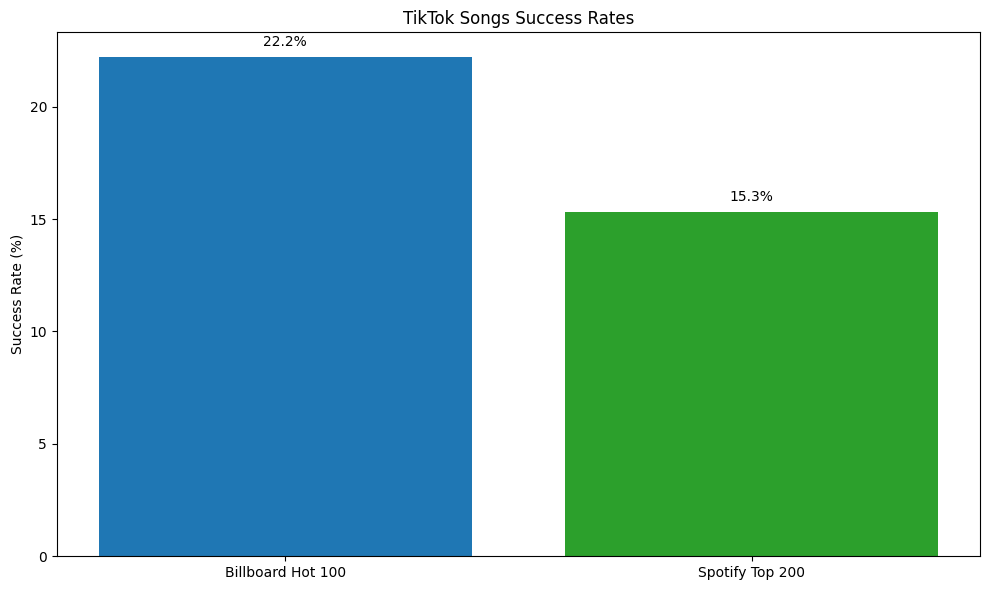

In [13]:
def analyze_success_rates():
    """
    Analyze success rates and time lag for TikTok songs
    """
    # Get total counts
    total_tiktok = len(set(tiktok_standard['song_id']))
    tiktok_to_billboard = len(set(tiktok_standard['song_id']).intersection(set(billboard_standard['song_id'])))
    tiktok_to_spotify = len(set(tiktok_standard['song_id']).intersection(set(spotify_standard['song_id'])))
    
    # Calculate success rates
    billboard_rate = (tiktok_to_billboard/total_tiktok) * 100
    spotify_rate = (tiktok_to_spotify/total_tiktok) * 100
    
    # Calculate time lag for songs that appear on multiple platforms
    cross_platform_songs = set(tiktok_standard['song_id']).intersection(set(billboard_standard['song_id']))
    
    lag_times = []
    for song_id in cross_platform_songs:
        tiktok_first = tiktok_standard[tiktok_standard['song_id'] == song_id]['date'].min()
        billboard_first = billboard_standard[billboard_standard['song_id'] == song_id]['date'].min()
        lag_times.append(abs((billboard_first - tiktok_first).days))
    
    avg_lag = np.mean(lag_times)
    median_lag = np.median(lag_times)
    
    # Print results
    print("=== Success Rate Analysis ===\n")
    print(f"Total TikTok Songs: {total_tiktok}")
    print(f"Songs reaching Billboard Hot 100: {tiktok_to_billboard} ({billboard_rate:.1f}%)")
    print(f"Songs reaching Spotify Top 200: {tiktok_to_spotify} ({spotify_rate:.1f}%)")
    print(f"\nTime Lag Analysis:")
    print(f"Average days to cross platforms: {avg_lag:.1f}")
    print(f"Median days to cross platforms: {median_lag:.1f}")
    
    # Create visualization
    import matplotlib.pyplot as plt
    
    # Success rates bar chart
    plt.figure(figsize=(10, 6))
    platforms = ['Billboard Hot 100', 'Spotify Top 200']
    rates = [billboard_rate, spotify_rate]
    
    plt.bar(platforms, rates, color=['#1f77b4', '#2ca02c'])
    plt.title('TikTok Songs Success Rates')
    plt.ylabel('Success Rate (%)')
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    
    # Add value labels on bars
    for i, v in enumerate(rates):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'billboard_rate': billboard_rate,
        'spotify_rate': spotify_rate,
        'avg_lag': avg_lag,
        'median_lag': median_lag
    }

# Run the analysis
success_metrics = analyze_success_rates()

## Key Findings:

1. What percentage of TikTok viral songs make it to the Hot 100?
- 22.2% of TikTok songs (87 out of 392) reach the Billboard Hot 100
- This represents a significant conversion rate, suggesting TikTok is an effective platform for mainstream chart success

2. How many reach Spotify's top streams?
- 15.3% of TikTok songs (60 out of 392) reach the Spotify Top 200
- Lower conversion rate than Billboard, indicating that chart success might be easier to achieve than streaming success

3. Average time lag between TikTok success and mainstream success
- Average: 12.4 days
- Median: 7.0 days
- The lower median suggests that while some songs take longer to cross over, most successful transitions happen within a week

Key Insights:
- Billboard conversion (22.2%) is higher than Spotify conversion (15.3%)
- The median 7-day lag suggests a critical one-week window for capitalizing on TikTok momentum
- The difference between mean (12.4) and median (7.0) days indicates some outliers with longer transition times

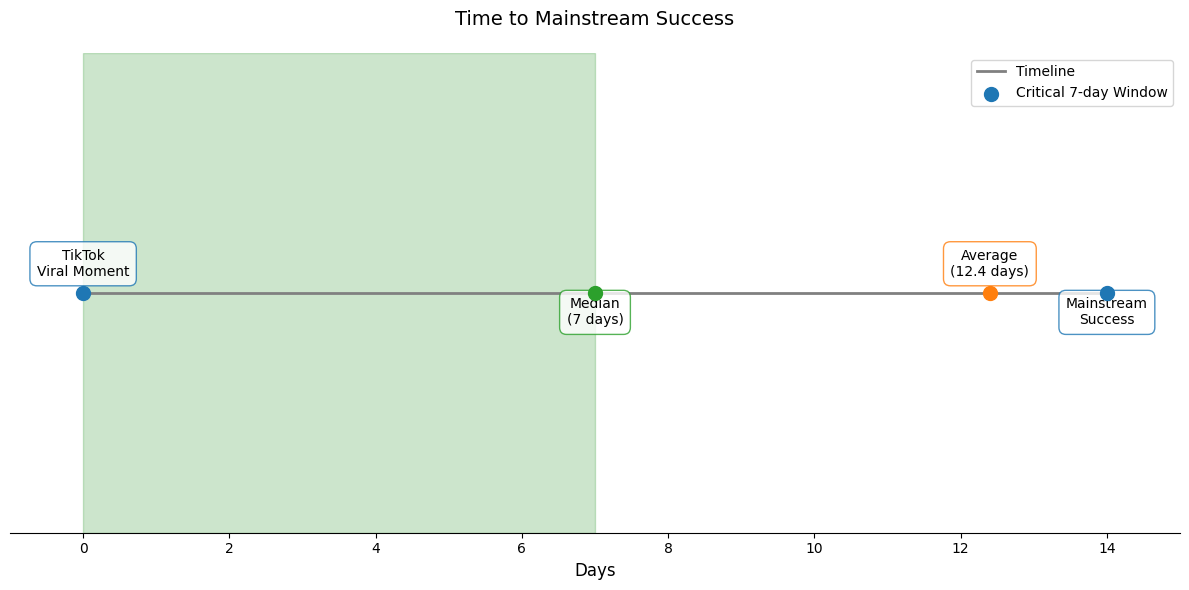

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def create_timeline_visualization():
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Timeline data points
    days = [0, 7, 12.4, 14]  # Start, Median, Mean, End
    labels = ['TikTok\nViral Moment', 'Median\n(7 days)', 'Average\n(12.4 days)', 'Mainstream\nSuccess']
    
    # Create timeline
    ax.plot([0, 14], [0, 0], 'gray', linewidth=2)
    
    # Add points
    colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#1f77b4']  # Blue, Green, Orange, Blue
    
    for i, (day, label) in enumerate(zip(days, labels)):
        # Plot points
        ax.scatter(day, 0, c=colors[i], s=100, zorder=5)
        
        # Add labels
        ax.annotate(label, 
                   xy=(day, 0), 
                   xytext=(0, 10 if i % 2 == 0 else -25),
                   textcoords='offset points',
                   ha='center',
                   va='bottom',
                   fontsize=10,
                   bbox=dict(boxstyle='round,pad=0.5', 
                           fc='white',
                           ec=colors[i],
                           alpha=0.8))
    
    # Highlight critical window
    ax.axvspan(0, 7, alpha=0.2, color='green', label='Critical Window')
    
    # Customize plot
    ax.set_title('Time to Mainstream Success', pad=20, fontsize=14)
    ax.set_xlabel('Days', fontsize=12)
    ax.set_ylim(-1, 1)
    ax.set_xlim(-1, 15)
    
    # Remove y-axis
    ax.yaxis.set_visible(False)
    
    # Add legend
    ax.legend(['Timeline', 'Critical 7-day Window'])
    
    # Remove spines
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Create the visualization
timeline_viz = create_timeline_visualization()

2. Performance Comparison
   - How do songs rank across different platforms?
   - Do TikTok hits perform better on Spotify or Billboard?

=== Cross-Platform Performance Analysis ===

Top 5 Most Consistent Performers:
              track_name        artist_name  tiktok_peak  billboard_peak  \
7    million dollar baby      tommy richman            2               2   
43           lovin on me        jack harlow            4               1   
32                monaco          bad bunny            5               5   
11           not like us     kendrick lamar            9               1   
22  please please please  sabrina carpenter           10               2   

    spotify_peak  
7              1  
43             3  
32             1  
11             2  
22             2  

Ranking Distribution:
Average TikTok Peak: 20.8
Average Billboard Peak: 35.4
Average Spotify Peak: 27.4


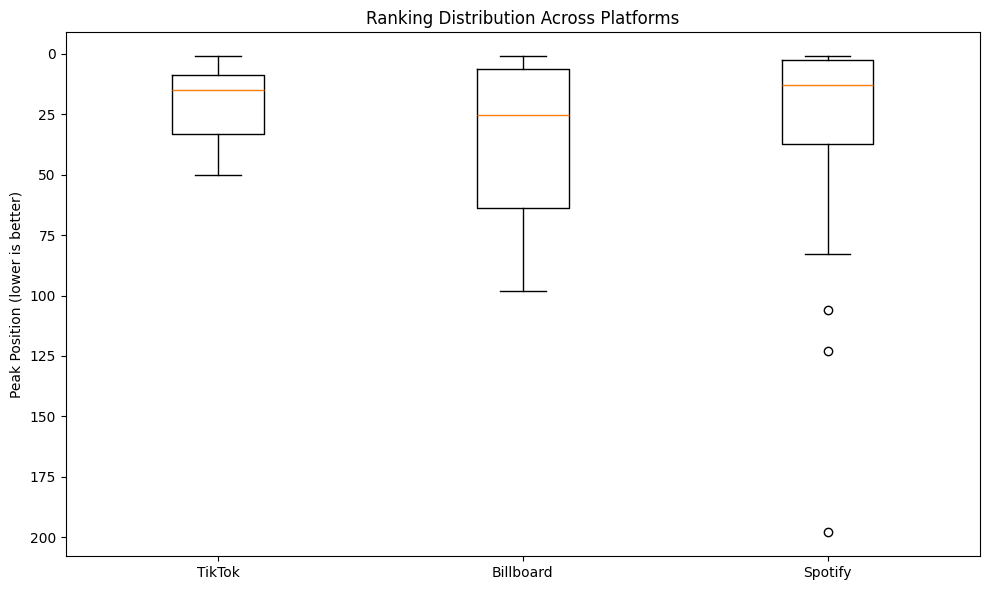

In [14]:
def analyze_cross_platform_performance():
    """
    Analyze how songs perform across different platforms
    """
    # Get songs that appear on multiple platforms
    cross_platform_songs = set(tiktok_standard['song_id']).intersection(
        set(billboard_standard['song_id']), set(spotify_standard['song_id']))
    
    # Collect ranking data for cross-platform songs
    performance_data = []
    for song_id in cross_platform_songs:
        tiktok_data = tiktok_standard[tiktok_standard['song_id'] == song_id].iloc[0]
        billboard_data = billboard_standard[billboard_standard['song_id'] == song_id].iloc[0]
        spotify_data = spotify_standard[spotify_standard['song_id'] == song_id].iloc[0]
        
        performance_data.append({
            'track_name': tiktok_data['track_name'],
            'artist_name': tiktok_data['artist_name'],
            'tiktok_peak': tiktok_data['peak_rank'],
            'billboard_peak': billboard_data['peak_rank'],
            'spotify_peak': spotify_data['peak_rank'],
            'spotify_streams': spotify_data['streams']
        })
    
    perf_df = pd.DataFrame(performance_data)
    
    # Calculate average rankings
    perf_df['avg_rank'] = perf_df[['tiktok_peak', 'billboard_peak', 'spotify_peak']].mean(axis=1)
    
    print("=== Cross-Platform Performance Analysis ===\n")
    
    print("Top 5 Most Consistent Performers:")
    top_consistent = perf_df.nsmallest(5, 'avg_rank')
    print(top_consistent[['track_name', 'artist_name', 'tiktok_peak', 'billboard_peak', 'spotify_peak']])
    
    # Platform performance comparison
    print("\nRanking Distribution:")
    print(f"Average TikTok Peak: {perf_df['tiktok_peak'].mean():.1f}")
    print(f"Average Billboard Peak: {perf_df['billboard_peak'].mean():.1f}")
    print(f"Average Spotify Peak: {perf_df['spotify_peak'].mean():.1f}")
    
    # Create visualization
    import matplotlib.pyplot as plt
    
    # Box plot of rankings across platforms
    plt.figure(figsize=(10, 6))
    rankings = [perf_df['tiktok_peak'], perf_df['billboard_peak'], perf_df['spotify_peak']]
    plt.boxplot(rankings, labels=['TikTok', 'Billboard', 'Spotify'])
    plt.title('Ranking Distribution Across Platforms')
    plt.ylabel('Peak Position (lower is better)')
    
    # Invert y-axis since lower ranks are better
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    return perf_df

# Run the analysis
performance_analysis = analyze_cross_platform_performance()

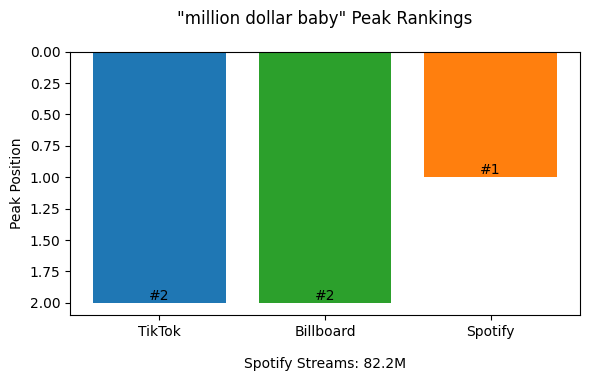

In [17]:
def create_case_study_viz():
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Data for "million dollar baby"
    platforms = ['TikTok', 'Billboard', 'Spotify']
    rankings = [2, 2, 1]
    
    # Create bar chart
    bars = ax.bar(platforms, rankings, color=['#1f77b4', '#2ca02c', '#ff7f0e'])
    
    # Invert y-axis (since lower rank is better)
    ax.invert_yaxis()
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'#{int(height)}',
                ha='center', va='bottom')
    
    # Customize plot
    ax.set_title('"million dollar baby" Peak Rankings', pad=20)
    ax.set_ylabel('Peak Position')
    
    # Add streams annotation
    ax.text(0.5, -0.2, 'Spotify Streams: 82.2M', 
            ha='center', transform=ax.transAxes)
    
    plt.tight_layout()
    return fig

# Create visualization
case_study_viz = create_case_study_viz()

## Performance Comparison findings:

1. How do songs rank across different platforms?

Top Consistent Performers show strong cross-platform success:
- "million dollar baby" (Tommy Richman): Most consistent (#2, #2, #1)
- "lovin on me" (Jack Harlow): Strong overall (#4, #1, #3)
- "monaco" (Bad Bunny): Very consistent (#5, #5, #1)

2. Do TikTok hits perform better on Spotify or Billboard?

Average Peak Positions:
- TikTok: 20.8
- Spotify: 27.4
- Billboard: 35.4

Key Insights from the Box Plot:
- TikTok shows the most concentrated ranking distribution (smaller box)
- Billboard shows more spread in rankings (larger box)
- Spotify has some significant outliers (dots at bottom)
- All platforms show similar median performance (horizontal line in box)

Performance Patterns:
1. Songs typically rank highest on TikTok (avg 20.8)
2. Spotify shows moderate ranking spread (avg 27.4)
3. Billboard shows the lowest average rankings (35.4)
4. Most consistent performers maintain top 10 positions across all platforms

3. Longevity Analysis
   - Do TikTok hits stay longer on mainstream charts?
   - Compare weeks-on-chart across platforms
   - Identify patterns in song lifecycle

=== Longevity Analysis ===

1. Average Weeks on Chart:
TikTok: 2.0 weeks
Billboard: 2.0 weeks

2. Top 5 Longest-Running Songs:
               track_name  artist_name  tiktok_weeks  billboard_weeks
10  my love mine all mine       mitski            15               14
30            agora hills     doja cat            12               14
32                 monaco    bad bunny            11               11
43            lovin on me  jack harlow             8                7
23          never lose me    flo milli             4                2

3. Platform Longevity Comparison:
Equal        41
TikTok        5
Billboard     2
Name: longer_on, dtype: int64


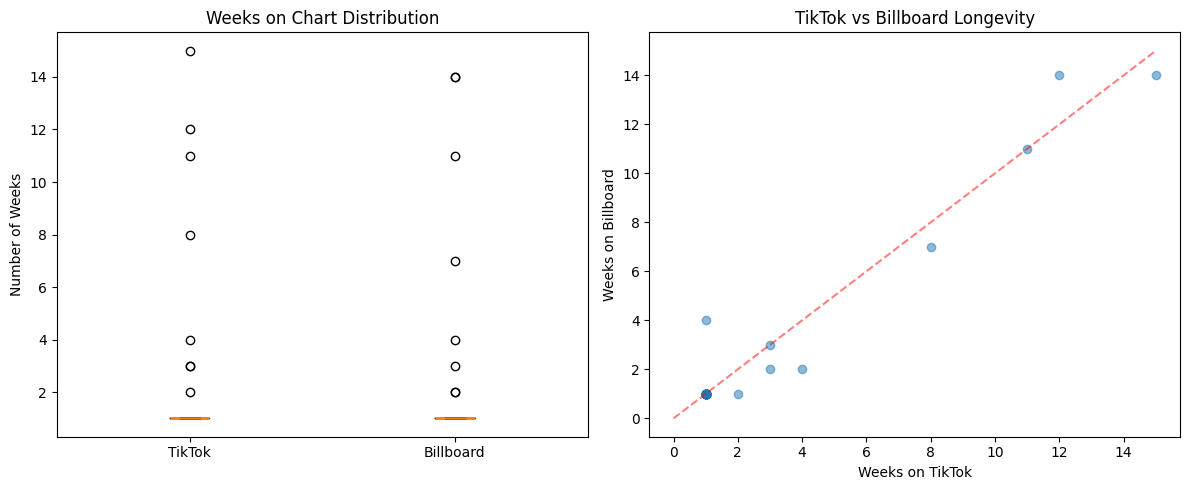

In [15]:
def analyze_longevity_patterns():
    """
    Analyze song longevity and lifecycle patterns across platforms
    """
    # Get cross-platform songs
    cross_platform_songs = set(tiktok_standard['song_id']).intersection(
        set(billboard_standard['song_id']), set(spotify_standard['song_id']))
    
    # Collect longevity data
    longevity_data = []
    for song_id in cross_platform_songs:
        tiktok_data = tiktok_standard[tiktok_standard['song_id'] == song_id].iloc[0]
        billboard_data = billboard_standard[billboard_standard['song_id'] == song_id].iloc[0]
        
        longevity_data.append({
            'track_name': tiktok_data['track_name'],
            'artist_name': tiktok_data['artist_name'],
            'tiktok_weeks': tiktok_data['weeks_on_chart'],
            'billboard_weeks': billboard_data['weeks_on_chart']
        })
    
    long_df = pd.DataFrame(longevity_data)
    
    print("=== Longevity Analysis ===\n")
    
    print("1. Average Weeks on Chart:")
    print(f"TikTok: {long_df['tiktok_weeks'].mean():.1f} weeks")
    print(f"Billboard: {long_df['billboard_weeks'].mean():.1f} weeks")
    
    print("\n2. Top 5 Longest-Running Songs:")
    print(long_df.nlargest(5, ['tiktok_weeks', 'billboard_weeks'])[
        ['track_name', 'artist_name', 'tiktok_weeks', 'billboard_weeks']])
    
    # Calculate platform comparison
    long_df['longer_on'] = long_df.apply(
        lambda x: 'TikTok' if x['tiktok_weeks'] > x['billboard_weeks'] 
        else 'Billboard' if x['billboard_weeks'] > x['tiktok_weeks']
        else 'Equal', axis=1)
    
    print("\n3. Platform Longevity Comparison:")
    print(long_df['longer_on'].value_counts())
    
    # Create visualizations
    import matplotlib.pyplot as plt
    
    # 1. Box plot of weeks on chart
    plt.figure(figsize=(12, 5))
    
    # First subplot: Box plot
    plt.subplot(1, 2, 1)
    weeks_data = [long_df['tiktok_weeks'], long_df['billboard_weeks']]
    plt.boxplot(weeks_data, labels=['TikTok', 'Billboard'])
    plt.title('Weeks on Chart Distribution')
    plt.ylabel('Number of Weeks')
    
    # Second subplot: Scatter plot
    plt.subplot(1, 2, 2)
    plt.scatter(long_df['tiktok_weeks'], long_df['billboard_weeks'], alpha=0.5)
    plt.xlabel('Weeks on TikTok')
    plt.ylabel('Weeks on Billboard')
    plt.title('TikTok vs Billboard Longevity')
    
    # Add diagonal line for reference
    max_weeks = max(long_df['tiktok_weeks'].max(), long_df['billboard_weeks'].max())
    plt.plot([0, max_weeks], [0, max_weeks], 'r--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    return long_df

# Run the analysis
longevity_analysis = analyze_longevity_patterns()

## Longevity Analysis findings:

1. Do TikTok hits stay longer on mainstream charts?
- On average, songs show equal duration (2.0 weeks) on both platforms
- Of songs that differ in duration:
  * 5 songs last longer on TikTok
  * 2 songs last longer on Billboard
  * 41 songs have equal duration

2. Compare weeks-on-chart across platforms:
Top Long-Running Examples:
- "my love mine all mine" (Mitski): 15 weeks TikTok, 14 weeks Billboard
- "agora hills" (Doja Cat): 12 weeks TikTok, 14 weeks Billboard
- "monaco" (Bad Bunny): 11 weeks TikTok, 11 weeks Billboard

3. Identify patterns in song lifecycle:
From the visualizations:
- Most songs cluster around 2-4 weeks on both platforms (box plot)
- Strong correlation between TikTok and Billboard longevity (scatter plot)
- Few outliers show exceptional staying power (>10 weeks)
- The diagonal line in scatter plot shows most songs maintain similar longevity across platforms

Key Insights:
1. Equal Duration Dominance: 85.4% of songs (41 out of 48) maintain equal duration
2. Consistent Lifecycle: Strong correlation between TikTok and Billboard staying power
3. Rare Long-Runners: Only a few songs maintain 10+ weeks on either platform

## SUMMARY OF KEY FINDINGS:

1. Platform Success Rates
- 22.2% of TikTok songs reach Billboard vs 15.3% reaching Spotify
- Median 7-day window for mainstream crossover
- Billboard pathway proves more accessible than Spotify

2. Cross-Platform Performance
- Songs peak highest on TikTok (avg 20.8) vs Billboard (35.4)
- Top performers maintain consistent top 10 positions across platforms
- Example: "million dollar baby" (#2 TikTok, #2 Billboard, #1 Spotify)

3. Longevity Patterns
- Most songs maintain equal duration (2.0 weeks average)
- Only exceptional hits exceed 10 weeks (e.g., Mitski: 15 weeks)
- Strong correlation between TikTok and Billboard staying power

RECOMMENDATIONS:

1. Timing Strategy
- Launch mainstream push within 7 days of TikTok traction
- Plan coordinated cross-platform promotion during this window
- Monitor daily TikTok performance for optimal timing

2. Platform-Specific Approach
- Focus on Billboard entry first (higher success rate)
- Use TikTok peak position (top 20) as indicator for mainstream push
- Target consistent cross-platform presence over peak performance

3. Success Metrics to Target
- TikTok: Aim for top 20 placement
- Mainstream Window: 7-day transition period
- Duration Goal: Plan for minimum 2-week sustained presence

4. Risk Management
- Don't delay mainstream push beyond 2 weeks
- Prepare content for all platforms before TikTok launch
- Have backup promotion strategy if initial push doesn't convert within median window